In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, MaxPooling2D,Flatten,Dense
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Simulate a batch of images
np.random.seed(1)
X = np.random.randn(10,64,64,3) #10 RGB images of size 64x64
print(f"Input shape: {X.shape}")

Input shape: (10, 64, 64, 3)


In [5]:
# Define a simple CNN model using Keras
model = Sequential([
    ZeroPadding2D(padding=3,input_shape=(64,64,3)),
    Conv2D(filters=8,kernel_size=(3,3),strides=(1,1),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=16,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(units=1,activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 70, 70, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 68, 68, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 34, 34, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,489 (21.44 KB)

 Trainable params: 5,489 (21.44 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
# Dummy binary labels
Y = np.random.randint(0,2,size=(10,1))

#Train the model (just 1 epoch for demonstration purpose)
model.fit(X,Y,epochs=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 0.7761


In [8]:
#Train the model for more epochs
history = model.fit(X,Y,epochs=10, verbose=0)

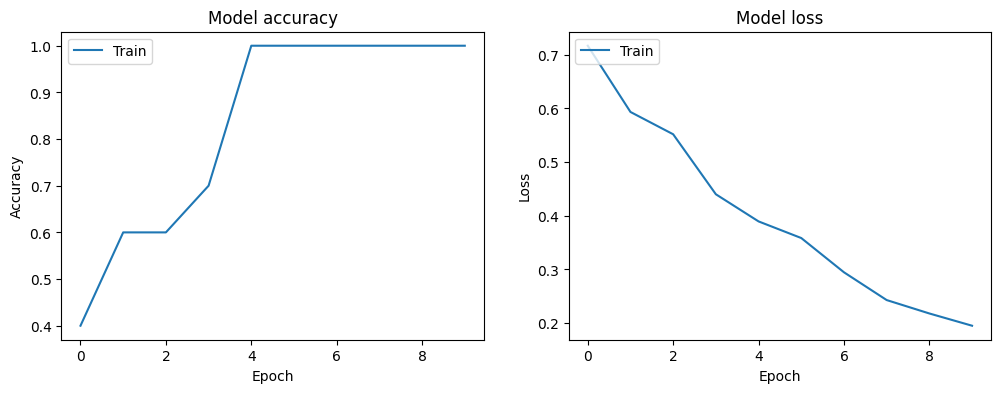

In [9]:
# Plot training accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.show()

In [10]:
# Make predictions on the training data
predictions = model.predict(X)

# Display the predictions
print("Predictions on training data:")
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Predictions on training data:
[[0.918456  ]
 [0.91455495]
 [0.21051875]
 [0.91153294]
 [0.24209704]
 [0.9194668 ]
 [0.24950136]
 [0.9163224 ]
 [0.2639639 ]
 [0.91243744]]


In [11]:
# Display the original labels
print("Original labels:")
print(Y)

Original labels:
[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]
